<a href="https://colab.research.google.com/github/SinhaUma/MLP/blob/main/RNN(Airplane).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

In [46]:
dataset = pd.read_csv(r'/content/AirPassengers (5).csv')
dataset = dataset['#Passengers']
dataset = np.array(dataset).reshape(-1,1)
dataset[:10]

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119]])

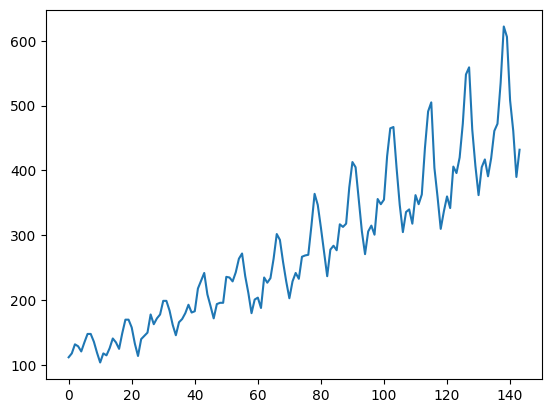

In [3]:
plt.plot(dataset)

In [47]:
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)

In [48]:
train_size = 100
test_size = 44
train = dataset[0:train_size, :]
train.shape

(100, 1)

In [49]:
test = dataset[train_size:144, :]
test.shape

(44, 1)

In [50]:
def get_data(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 1
X_train, y_train = get_data(train, look_back)
X_train[:5]

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853]])

In [34]:
y_train[:10]

array([0.02702703, 0.05405405, 0.04826255, 0.03281853, 0.05984556,
       0.08494208, 0.08494208, 0.06177606, 0.02895753, 0.        ])

In [51]:
X_test, y_test = get_data(test, look_back)

In [52]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [53]:
model = Sequential()
model.add(LSTM(5, input_shape = (1, look_back)))
model.add(Dense(1))

In [ ]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [14]:
model.fit(X_train, y_train,epochs=100, batch_size=1)

Epoch 1/100
98/98 [==============================] - 3s 3ms/step - loss: 0.0228
Epoch 2/100
98/98 [==============================] - 0s 4ms/step - loss: 0.0098
Epoch 3/100
98/98 [==============================] - 0s 3ms/step - loss: 0.0082
Epoch 4/100
98/98 [==============================] - 0s 3ms/step - loss: 0.0072
Epoch 5/100
98/98 [==============================] - 0s 2ms/step - loss: 0.0063
Epoch 6/100
98/98 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 7/100
98/98 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 8/100
98/98 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 9/100
98/98 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 10/100
98/98 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 11/100
98/98 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 12/100
98/98 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 13/100
98/98 [=================

In [16]:
y_pred = model.predict(X_test)

2/2 [==============================] - 1s 7ms/step


In [17]:
y_pred = scaler.inverse_transform(y_pred)
y_test = np.array(y_test)
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

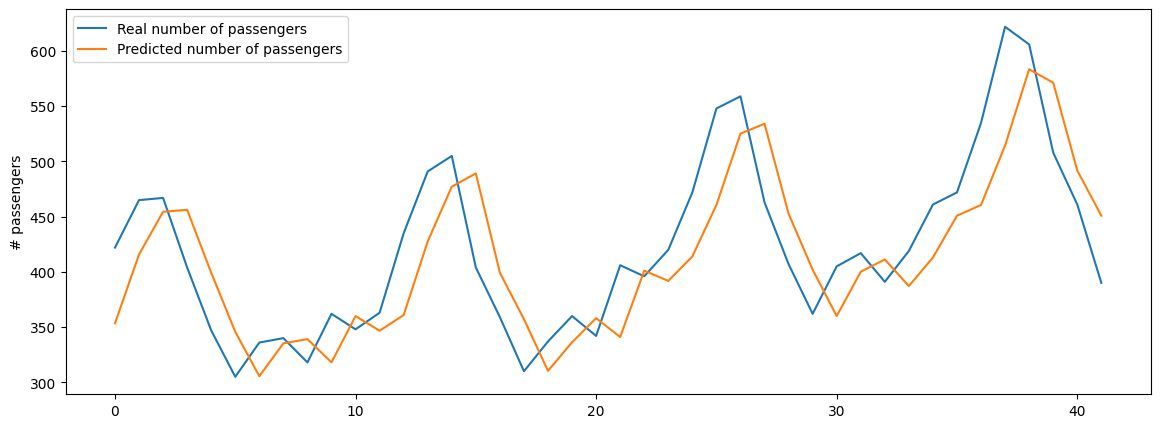

In [18]:
# plot baseline and predictions
plt.figure(figsize=(14,5))
plt.plot(y_test, label = 'Real number of passengers')
plt.plot(y_pred, label = 'Predicted number of passengers')
plt.ylabel('# passengers')
plt.legend()
plt.show()

Using SGD optimizer

In [54]:
model.compile(loss = 'mean_squared_error', optimizer = 'sgd')

In [55]:
model.fit(X_train, y_train,epochs=50, batch_size=1)

Epoch 1/50
98/98 [==============================] - 2s 2ms/step - loss: 0.0272
Epoch 2/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0173
Epoch 3/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0175
Epoch 4/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0170
Epoch 5/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0170
Epoch 6/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0167
Epoch 7/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0163
Epoch 8/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0158
Epoch 9/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0163
Epoch 10/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0160
Epoch 11/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0158
Epoch 12/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0156
Epoch 13/50
98/98 [==============================

In [56]:
y_pred1 = model.predict(X_test)

2/2 [==============================] - 0s 7ms/step


In [58]:
y_pred1 = scaler.inverse_transform(y_pred1)
y_test = np.array(y_test)
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

In [59]:
y_pred1

array([[263.75583],
       [285.77405],
       [299.51144],
       [300.142  ],
       [279.92722],
       [261.08356],
       [246.92747],
       [257.39584],
       [258.73853],
       [251.33034],
       [266.08716],
       [261.41803],
       [266.41965],
       [289.9625 ],
       [307.64725],
       [311.97116],
       [279.92722],
       [265.08884],
       [248.62299],
       [257.73172],
       [265.42172],
       [259.40918],
       [280.5795 ],
       [277.31165],
       [285.1271 ],
       [301.71503],
       [324.98856],
       [328.2521 ],
       [298.88013],
       [280.90536],
       [266.08716],
       [280.25345],
       [284.15536],
       [275.6718 ],
       [284.80334],
       [298.248  ],
       [301.71503],
       [321.09613],
       [346.39102],
       [341.87564],
       [312.89243],
       [298.248  ]], dtype=float32)

In [60]:
y_test

array([[422.],
       [465.],
       [467.],
       [404.],
       [347.],
       [305.],
       [336.],
       [340.],
       [318.],
       [362.],
       [348.],
       [363.],
       [435.],
       [491.],
       [505.],
       [404.],
       [359.],
       [310.],
       [337.],
       [360.],
       [342.],
       [406.],
       [396.],
       [420.],
       [472.],
       [548.],
       [559.],
       [463.],
       [407.],
       [362.],
       [405.],
       [417.],
       [391.],
       [419.],
       [461.],
       [472.],
       [535.],
       [622.],
       [606.],
       [508.],
       [461.],
       [390.]])

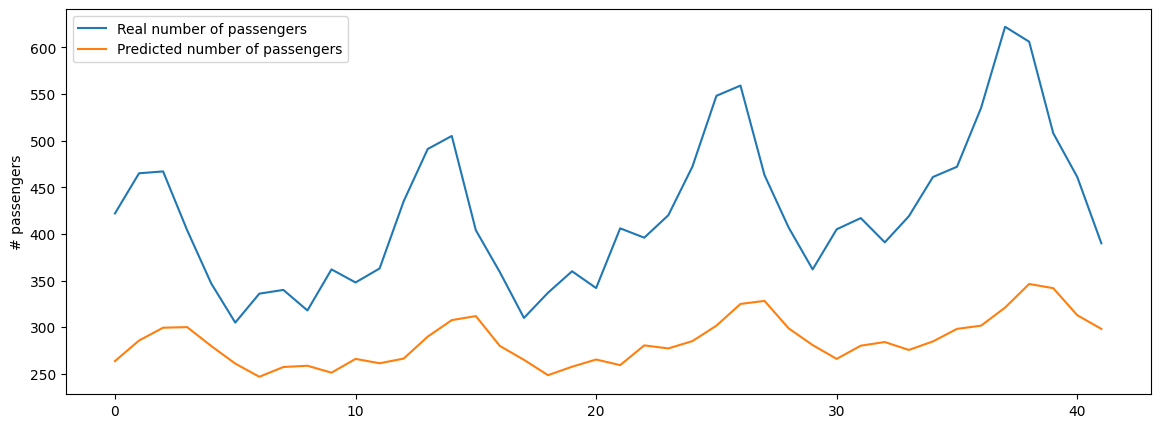

In [61]:
# plot baseline and predictions
plt.figure(figsize=(14,5))
plt.plot(y_test, label = 'Real number of passengers')
plt.plot(y_pred1, label = 'Predicted number of passengers')
plt.ylabel('# passengers')
plt.legend()
plt.show()